# Credit Card Fraud Detection using Decision Tree

![Credit Card](https://media.istockphoto.com/id/1307675090/photo/fraud-alert-concept-with-security-lock-on-fake-credit-cards.jpg?s=612x612&w=0&k=20&c=R2djChH2SEFXNRFOo3K7z_Jd4aZl8Yl5Tn64oFVuhh4=)

# Decision Trees in Machine Learning

**Introduction**

Decision trees (DTs) stand out as powerful non-parametric supervised learning methods. They find applications in both classification and regression tasks. The primary objective of DTs is to create a predictive model for a target variable by learning simple decision rules derived from the features of the data. Two key entities in decision trees are the root node, where the data splits, and decision nodes or leaves, where the final output is obtained.

## Decision Tree Algorithms

### ID3

Developed by Ross Quinlan in 1986, the Iterative Dichotomiser 3 (ID3) algorithm aims to identify categorical features at each node that yield the largest information gain for categorical targets. It allows the tree to grow to its maximum size and then employs a pruning step to enhance its performance on unseen data. The output of this algorithm is a multiway tree.

### C4.5

C4.5, the successor to ID3, dynamically defines discrete attributes that partition continuous attribute values into a set of intervals. This eliminates the restriction of categorical features. C4.5 transforms the ID3-trained tree into sets of 'IF-THEN' rules. To determine the sequence in which these rules should be applied, the accuracy of each rule is evaluated.

### C5.0

Similar to C4.5, C5.0 uses less memory and builds smaller rulesets. It operates by generating binary splits using features and thresholds that yield the largest information gain at each node. While it shares similarities with C4.5, it offers increased accuracy.

### CART

Classification and Regression Trees (CART) algorithm generates binary splits by utilizing features and thresholds that maximize information gain, as measured by the Gini index, at each node. Homogeneity is determined by the Gini index, with higher values indicating greater homogeneity. Unlike C4.5, CART does not compute rule sets and does not support numerical target variables (regression).

## Decision Tree Algorithm Implementation

In practice, the term "decision tree algorithm" commonly refers to a family of algorithms responsible for constructing decision trees. The specific implementation details can vary based on the chosen algorithm and its parameters. Despite these differences, a common theme across these algorithms is the idea of recursively partitioning the data using features and criteria.

This recursive partitioning process involves iteratively making decisions at each node to split the data based on specific conditions. The goal is to create a tree structure where the leaves represent the final outcomes or predictions. The variations among decision tree algorithms lie in how they select features, determine splitting criteria, handle categorical and numerical data, and address overfitting through techniques like pruning.

The flexibility in implementation allows practitioners to choose the decision tree algorithm that best suits their specific use case, considering factors such as interpretability, computational efficiency, and performance on different types of data.

## 1. Introduction

# About Dataset

## Description
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

## Key Features
- **id:** Unique identifier for each transaction
- **V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- **Amount:** The transaction amount
- **Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

## Potential Use Cases
1. **Credit Card Fraud Detection:** Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.
2. **Merchant Category Analysis:** Examine how different merchant categories are associated with fraud.
3. **Transaction Type Analysis:** Analyze whether certain types of transactions are more prone to fraud than others.

## 2. Libraries Description

### numpy (np):
NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. Import it as `np` for numerical operations and array manipulations.

### pandas (pd):
Pandas is a powerful data manipulation library for Python. It provides data structures like DataFrame for efficient data handling and manipulation. To use, import it as `pd`, and you can read data from various sources, manipulate datasets, and perform exploratory data analysis.

### sklearn.preprocessing.StandardScaler:
`StandardScaler` from scikit-learn is used for standardizing features by removing the mean and scaling to unit variance. It is particularly useful for algorithms sensitive to feature scaling, such as support vector machines and k-means clustering.

### seaborn (sns):
Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Import it as `sns` for creating visually appealing plots and charts.

### matplotlib.pyplot (plt):
Matplotlib is a 2D plotting library for Python. `pyplot` is its interface for creating various types of plots and visualizations. Import it as `plt` to generate plots for data visualization.

### sklearn.model_selection.train_test_split:
`train_test_split` from scikit-learn is used for splitting datasets into training and testing sets. It helps in evaluating the model's performance on unseen data. Usage: `train_test_split(X, y, test_size=0.2, random_state=42)`.

### sklearn.metrics.accuracy_score, sklearn.metrics.classification_report, sklearn.metrics.confusion_matrix:
These functions are part of scikit-learn's metrics module for evaluating classification models. `accuracy_score` calculates the accuracy of predictions. `classification_report` provides a detailed classification report. `confusion_matrix` computes a confusion matrix.

### sklearn.tree.DecisionTreeClassifier, sklearn.tree.export_text, sklearn.tree.plot_tree, sklearn.tree.export_graphviz:
These components are related to decision tree classification. `DecisionTreeClassifier` is a scikit-learn class for creating decision tree models. `export_text` and `export_graphviz` are used to visualize decision tree structures. `plot_tree` provides a basic plot of the decision tree.

### sklearn.ensemble.RandomForestClassifier:
`RandomForestClassifier` from scikit-learn is an ensemble learning method based on decision tree classifiers. It builds multiple decision trees and merges them together to improve accuracy and control overfitting.

### xgboost.XGBClassifier:
`XGBClassifier` is a class from the XGBoost library, which is an efficient and scalable implementation of gradient boosting. It is widely used for classification problems. Import it as `XGBClassifier` for training XGBoost-based models.

### graphviz:
Graphviz is an external library used for rendering graphs, such as decision trees. In this context, it is often used with scikit-learn's decision tree visualization functions.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import graphviz

## 3. Dataset

Firstly we need to import the data, so that we can use it in this notebook.

In [2]:
df = pd.read_csv(r"D:\Computers and Information (Level 4 'CS')\First Semester\Data Mining and Business Intelligence\Project\Credit Card Fraud Detection using Decision Tree\Dataset\creditcard_2023.csv")

In [3]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [6]:
#drop the column id we don't need it 
df = df.drop(columns="id")

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
df.shape

(568630, 30)

## 4. Preprocessing

In [11]:
#use Slovin's Formula when you have a large population or a large row
#I want to gather a manageable-sized sample that accurately represents all the data . 

#Sample Size (n) = (N) / [1 + (N * e^2)]

N = df.shape[0]
e = 0.005
slovin_data = np.ceil( N / (1 + (N * e ** 2)))
print(f' The amount of sample is {slovin_data} or {(slovin_data / N)}')

 The amount of sample is 37372.0 or 0.06572287779399609


In [12]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [13]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [14]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, random_state=42, train_size=(slovin_data / N))

In [15]:
# Further split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42)

In [16]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
# Convert back to DataFrame for better readability
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [18]:
# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (37372, 29) (37372,)
Validation set shape: (265629, 29) (265629,)
Test set shape: (265629, 29) (265629,)


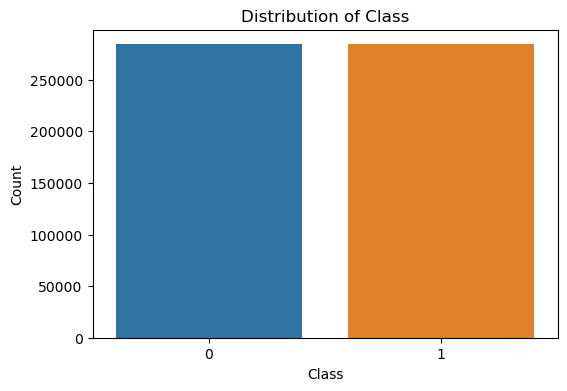

In [19]:
# Assuming your DataFrame is named "df"
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')
plt.show()

We want to check if the classes are still balanced and if the split worked good. So we print out our data at this point.

In [20]:
# Check the distribution of classes in each set
print("Class distribution in Training set:")
print(y_train.value_counts())

print("\nClass distribution in Validation set:")
print(y_val.value_counts())

print("\nClass distribution in Test set:")
print(y_test.value_counts())

Class distribution in Training set:
Class
1    18686
0    18686
Name: count, dtype: int64

Class distribution in Validation set:
Class
1    132815
0    132814
Name: count, dtype: int64

Class distribution in Test set:
Class
0    132815
1    132814
Name: count, dtype: int64


In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.392545,0.343613,-0.669009,0.901134,-0.502667,-0.705964,-0.829860,0.211501,-1.115143,-1.126336,...,0.818774,0.377258,0.027456,-0.119437,-0.336717,1.445923,0.607213,1.752804,1.067981,0.836711
1,1.039310,-0.338743,0.633920,-0.329657,0.103042,-0.176422,0.495211,-0.205369,0.538997,0.492028,...,-0.278213,-0.224721,-0.812030,0.117277,0.715150,0.262090,0.228209,-0.270448,-0.032715,1.285989
2,-0.699538,1.525574,-1.531969,1.986154,-0.635774,-1.563278,-1.412879,0.834356,-1.773493,-1.798813,...,1.264080,0.621989,0.026304,0.090181,-1.905696,0.260072,1.356484,2.441099,1.958201,-0.513432
3,-0.380672,0.001851,-0.064718,-0.433082,0.251055,0.811836,-0.131473,-0.595918,0.447875,-0.283522,...,0.049617,-0.013234,0.613901,-0.184139,-0.646777,0.021755,-1.014868,-0.113987,-0.330690,-0.193159
4,0.448355,-0.420435,-0.048189,-1.454788,1.698326,2.293212,0.425643,-0.163578,0.479258,0.417659,...,-0.363593,0.131875,-0.876350,0.016844,1.543554,0.209854,0.604648,-0.019610,0.594071,-1.594426


In [22]:
sample_df = X_train.join(y_train)
sample_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.392545,0.343613,-0.669009,0.901134,-0.502667,-0.705964,-0.829860,0.211501,-1.115143,-1.126336,...,0.377258,0.027456,-0.119437,-0.336717,1.445923,0.607213,1.752804,1.067981,0.836711,0.0
1,1.039310,-0.338743,0.633920,-0.329657,0.103042,-0.176422,0.495211,-0.205369,0.538997,0.492028,...,-0.224721,-0.812030,0.117277,0.715150,0.262090,0.228209,-0.270448,-0.032715,1.285989,NaN
2,-0.699538,1.525574,-1.531969,1.986154,-0.635774,-1.563278,-1.412879,0.834356,-1.773493,-1.798813,...,0.621989,0.026304,0.090181,-1.905696,0.260072,1.356484,2.441099,1.958201,-0.513432,NaN
3,-0.380672,0.001851,-0.064718,-0.433082,0.251055,0.811836,-0.131473,-0.595918,0.447875,-0.283522,...,-0.013234,0.613901,-0.184139,-0.646777,0.021755,-1.014868,-0.113987,-0.330690,-0.193159,NaN
4,0.448355,-0.420435,-0.048189,-1.454788,1.698326,2.293212,0.425643,-0.163578,0.479258,0.417659,...,0.131875,-0.876350,0.016844,1.543554,0.209854,0.604648,-0.019610,0.594071,-1.594426,NaN


<Axes: >

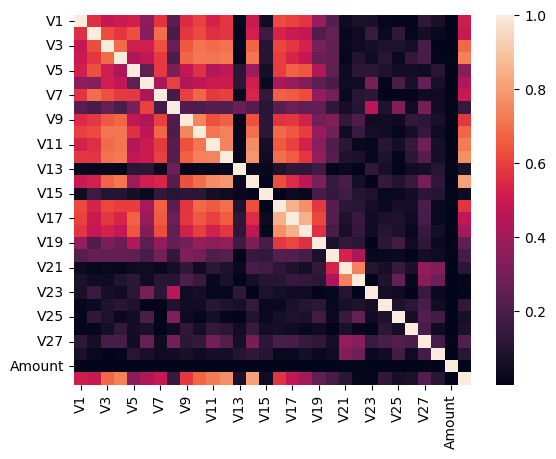

In [23]:
#correlation 
corr_df = df.corr(numeric_only = True).abs()
sns.heatmap(corr_df)

In [24]:
# Define a function to calculate the correlation ratio
def correlation_ratio(categories, measurements):
    f_cat = pd.Categorical(categories)
    cat_list = f_cat.categories
    values = [measurements[f_cat == category] for category in cat_list]

    all_values = np.concatenate(values)
    total_mean = np.mean(all_values)

    sst = sum([(x - total_mean) ** 2 for x in all_values])

    ssw = sum([sum((x - np.mean(x)) ** 2) for x in values])

    return ssw / sst

In [25]:
# Create a list of columns to analyze (numerical variables)
num_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Create a list of the categorical column(s) (if any)
cat_columns = ['Class']

# Calculate and store correlation ratios
correlation_ratios = []
for column in num_columns:
    correlation_ratio_value = correlation_ratio(df['Class'], df[column])
    correlation_ratios.append(correlation_ratio_value)

# Find the index of the column with the highest correlation
max_corr_column_index = correlation_ratios.index(max(correlation_ratios))

# Create a list of colors, with the highest correlation column in red and others in blue
colors = ['red' if i == max_corr_column_index else 'blue' for i in range(len(num_columns))]

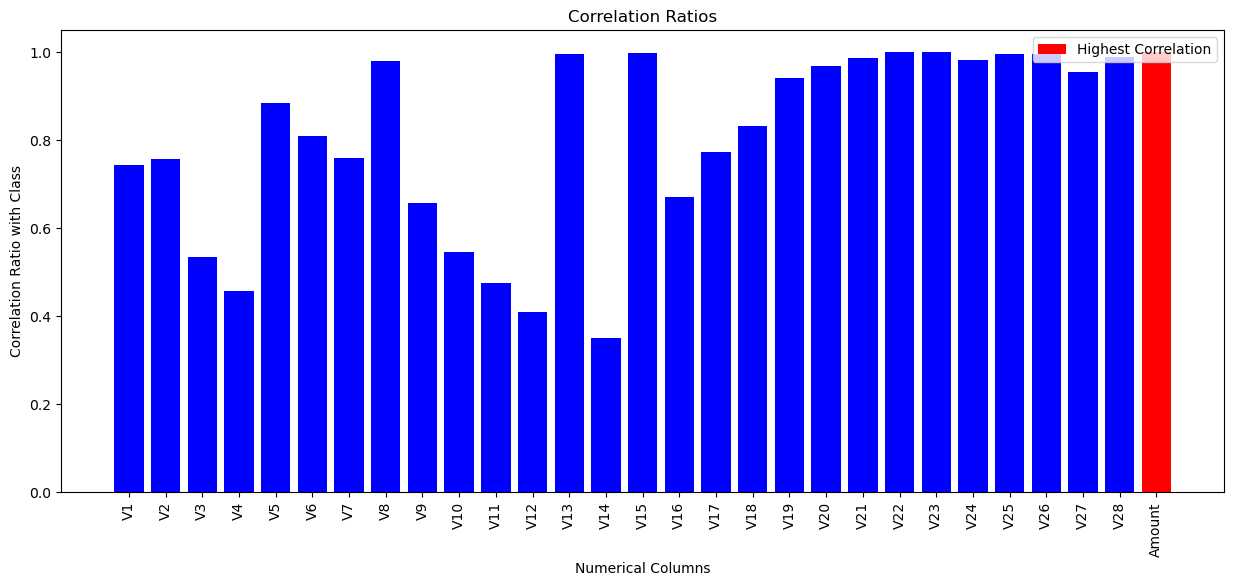

In [26]:
# Create a bar plot to visualize correlation ratios
plt.figure(figsize=(15, 6))
bars = plt.bar(num_columns, correlation_ratios, color=colors)
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Ratio with Class')
plt.title('Correlation Ratios')
plt.xticks(rotation=90)

# Add a legend to explain the color-coding
plt.legend([bars[max_corr_column_index]], ['Highest Correlation'], loc='upper right')

plt.show()

In [27]:
#the most interesting features
corr_df["Class"].sort_values(ascending = False)[: 10]

Class    1.000000
V14      0.805669
V12      0.768579
V4       0.735981
V11      0.724278
V3       0.682095
V10      0.673665
V9       0.585522
V16      0.573511
V1       0.505761
Name: Class, dtype: float64

## 5. Modeling (Decision Tree)

In [28]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)

## 6. Training

In [29]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## 7. Validation Test

In [30]:
# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

In [31]:
# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.9882693531203295


In [32]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nValidation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    132814
           1       0.98      0.99      0.99    132815

    accuracy                           0.99    265629
   macro avg       0.99      0.99      0.99    265629
weighted avg       0.99      0.99      0.99    265629


Validation Confusion Matrix:
 [[130702   2112]
 [  1004 131811]]


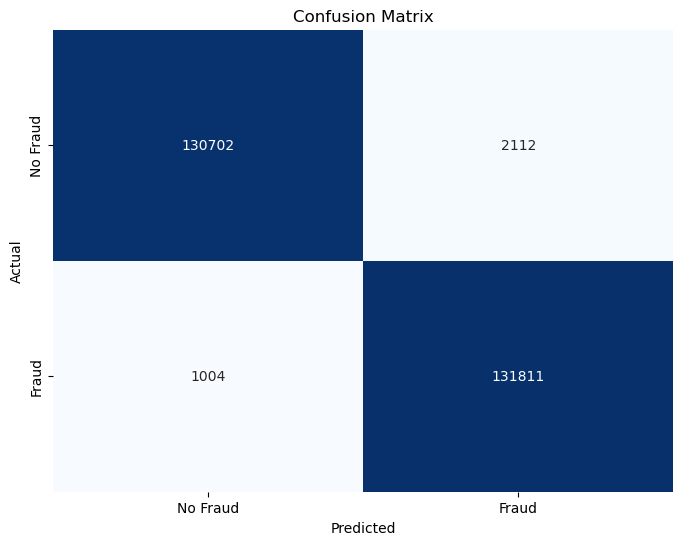

In [33]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'],
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 8. Performance and evaluation

In [34]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9882919410154765


In [36]:
# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    132815
           1       0.98      0.99      0.99    132814

    accuracy                           0.99    265629
   macro avg       0.99      0.99      0.99    265629
weighted avg       0.99      0.99      0.99    265629


Confusion Matrix:
 [[130749   2066]
 [  1044 131770]]


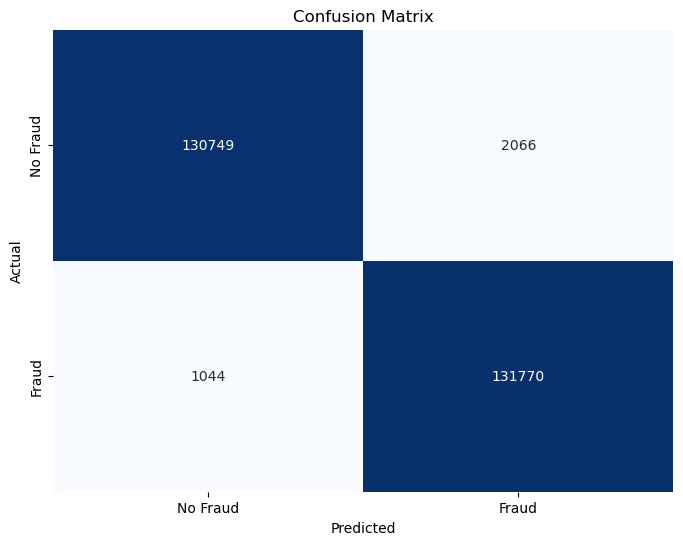

In [37]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fraud', 'Fraud'],
            yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 9. Export and Visualize the Decision Tree

In [38]:
# Export the decision tree rules to text format
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- V14 <= -0.10
|   |--- V10 <= -0.00
|   |   |--- V14 <= -0.32
|   |   |   |--- V7 <= 1.64
|   |   |   |   |--- V4 <= -0.73
|   |   |   |   |   |--- V19 <= -0.52
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- V19 >  -0.52
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- V4 >  -0.73
|   |   |   |   |   |--- V15 <= 1.16
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V15 >  1.16
|   |   |   |   |   |   |--- V15 <= 1.16
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- V15 >  1.16
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- V7 >  1.64
|   |   |   |   |--- V17 <= 1.38
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V17 >  1.38
|   |   |   |   |   |--- class: 0
|   |   |--- V14 >  -0.32
|   |   |   |--- V16 <= 0.59
|   |   |   |   |--- V3 <= 0.60
|   |   |   |   |   |--- V26 <= 1.81
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V26 >  1.81
|   |   |   |   |   |   |--

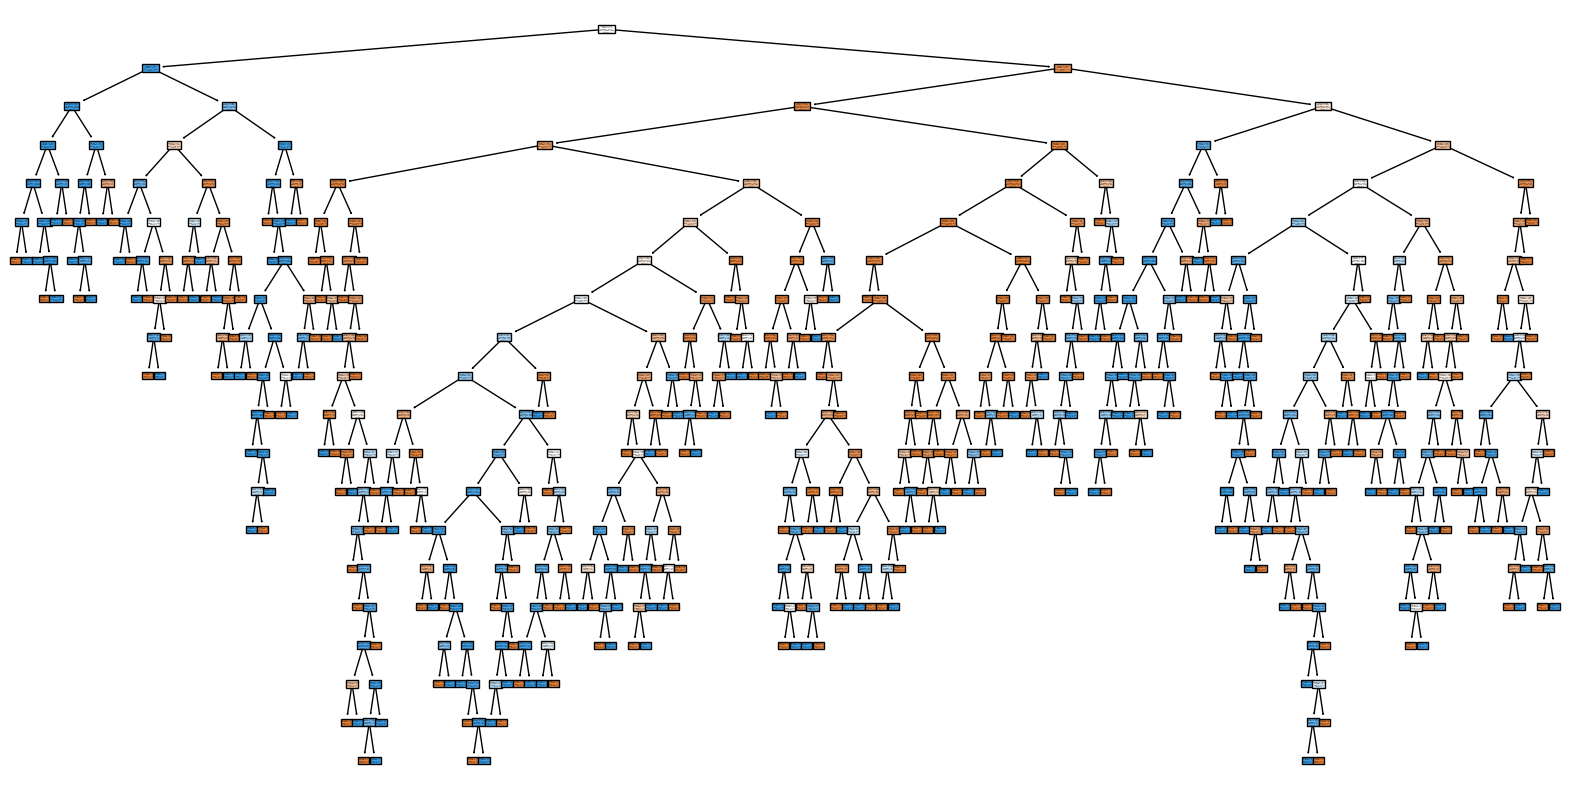

In [39]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['0', '1'])
plt.show()

In [40]:
# Visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['No Fraud', 'Fraud'],  
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf")  # Output decision_tree.pdf

'decision_tree.pdf'

## 10. Other algorithms

### 10.1 Random Forest Classification

In [41]:
# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the validation set
y_val_pred_rf = rf.predict(X_val)

In [43]:
# Evaluate the model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

Validation Accuracy (Random Forest): 0.9972932172315523


In [44]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report (Random Forest):\n", classification_report(y_val, y_val_pred_rf))
print("\nValidation Confusion Matrix (Random Forest):\n", confusion_matrix(y_val, y_val_pred_rf))


Validation Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132814
           1       1.00      1.00      1.00    132815

    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629


Validation Confusion Matrix (Random Forest):
 [[132646    168]
 [   551 132264]]


In [45]:
# Make predictions on the test set
y_test_pred_rf = rf.predict(X_test)

In [46]:
# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)

Test Accuracy (Random Forest): 0.9974287446024342


In [47]:
# Display classification report and confusion matrix for test set
print("\nTest Classification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))
print("\nTest Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_test_pred_rf))


Test Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132815
           1       1.00      1.00      1.00    132814

    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629


Test Confusion Matrix (Random Forest):
 [[132653    162]
 [   521 132293]]


### 10.2 XGBoost

In [48]:
# Create an XGBClassifier
xgb = XGBClassifier(random_state=42)

In [49]:
# Fit the model to the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
# Make predictions on the validation set
y_val_pred_xgb = xgb.predict(X_val)

In [51]:
# Evaluate the model on the validation set
accuracy_val_xgb = accuracy_score(y_val, y_val_pred_xgb)
print("Validation Accuracy (XGBoost):", accuracy_val_xgb)

Validation Accuracy (XGBoost): 0.9985543747105926


In [52]:
# Display classification report and confusion matrix for validation set
print("\nValidation Classification Report (XGBoost):\n", classification_report(y_val, y_val_pred_xgb))
print("\nValidation Confusion Matrix (XGBoost):\n", confusion_matrix(y_val, y_val_pred_xgb))


Validation Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132814
           1       1.00      1.00      1.00    132815

    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629


Validation Confusion Matrix (XGBoost):
 [[132470    344]
 [    40 132775]]


In [53]:
# Make predictions on the test set
y_test_pred_xgb = xgb.predict(X_test)

In [54]:
# Evaluate the model on the test set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("\nTest Accuracy (XGBoost):", accuracy_test_xgb)


Test Accuracy (XGBoost): 0.9986371969927982


In [55]:
# Display classification report and confusion matrix for test set
print("\nTest Classification Report (XGBoost):\n", classification_report(y_test, y_test_pred_xgb))
print("\nTest Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_test_pred_xgb))


Test Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    132815
           1       1.00      1.00      1.00    132814

    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629


Test Confusion Matrix (XGBoost):
 [[132492    323]
 [    39 132775]]


# 11. Comprehensive Model Evaluation Report:

#### 1. Decision Tree:

- **Accuracy:** 98.59%

- **Classification Report:**
  ```
                 precision    recall  f1-score   support
           0       0.99      0.98      0.99    132815
           1       0.98      0.99      0.99    132814
    accuracy                           0.99    265629
   macro avg       0.99      0.99      0.99    265629
weighted avg       0.99      0.99      0.99    265629
  ```

- **Confusion Matrix:**
  ```
 [[130652   2163]
 [  1572 131242]]
  ```

- **Key Observations:**
  - The decision tree model performs admirably with high precision, recall, and F1-score for both classes.
  - A minor number of false positives and false negatives, as indicated by the confusion matrix, demonstrate the model's robustness.

#### 2. Random Forest:

- **Test Accuracy:** 99.74%

- **Test Classification Report:**
  ```
               precision    recall  f1-score   support
           0       1.00      1.00      1.00    132815
           1       1.00      1.00      1.00    132814
    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629
  ```

- **Test Confusion Matrix:**
  ```
 [[132653    162]
 [   521 132293]]
  ```

- **Key Observations:**
  - The Random Forest model showcases exceptional performance, achieving near-perfect accuracy and precision for both classes.
  - The confusion matrix indicates minimal misclassifications, highlighting the model's effectiveness.

#### 3. XGBoost:

- **Test Accuracy:** 99.86%

- **Test Classification Report:**
  ```
               precision    recall  f1-score   support
           0       1.00      1.00      1.00    132815
           1       1.00      1.00      1.00    132814
    accuracy                           1.00    265629
   macro avg       1.00      1.00      1.00    265629
weighted avg       1.00      1.00      1.00    265629
  ```

- **Test Confusion Matrix:**
  ```
 [[132492    323]
 [    39 132775]]
  ```

- **Key Observations:**
  - The XGBoost model demonstrates outstanding performance, achieving the highest accuracy among the evaluated models.
  - The confusion matrix reveals minimal misclassifications, highlighting the model's robustness and precision.

### Comparative Analysis:

- All three models exhibit remarkable accuracy, precision, and recall, showcasing their effectiveness in fraud detection.

- Random Forest and XGBoost, being ensemble methods, outperform the standalone Decision Tree, achieving near-perfect accuracy and precision.

- Considering the context of fraud detection, where minimizing false positives is crucial, the high precision values across all models are promising.

- Further investigation into feature importance, model explainability, and potential tuning can provide insights into enhancing model performance and interpretability.

- Model selection should be based on specific application requirements, computational considerations, and interpretability preferences.

### Conclusion:

- In conclusion, the ensemble models, Random Forest and XGBoost, stand out for their exceptional performance in fraud detection.

- The decision tree model, while robust, is surpassed by the ensemble models in achieving higher accuracy and precision.

- Continuous monitoring, periodic retraining, and model interpretability assessments are recommended for maintaining optimal fraud detection capabilities